In [35]:
from PyNeFrauds.Globals import neo4jHandler
from PyNeFrauds.nn import EmbedFetcher, PyGDataWrapper

In [52]:
# set neo4j credentials
neo4jHandler.set_credentials("bolt://localhost:11003", "neo4j","password")

# set the parameters for fetching
embedFetcher = EmbedFetcher(embedProperty="GraphSage", uniqueID='project_id', target="fraud")

# fetch the embeddings
embedFetcher.fetchData()

# create torch_geometric acceptable format
dWrap = PyGDataWrapper()
dWrap.from_embed_fetcher(embedFetcher)
dWrap.set_train_mask(frac=0.2)

dWrap.show_data_info()


Number of nodes: 3860
Number of features: 7
Has isolated nodes: False


In [53]:
from collections import OrderedDict
from PyNeFrauds.nn import NNModel, train, ConfusionMatrix
import torch_geometric.nn as tgnn
import torch.nn as tnn

In [54]:
#building usual NN model
modules = OrderedDict({
    'GCN1' : tgnn.GCNConv(7, 30),
    'drop0': tnn.Dropout(p=0.5),
    'relu1': tnn.ReLU(),
    'GCN2' : tgnn.GCNConv(30, 40),
    'relu1': tnn.ReLU(),
    'linear': tnn.Linear(40,512),
    'relul1': tnn.ReLU(),
    'drop1': tnn.Dropout(p=0.2),
    'linear2': tnn.Linear(512,2),
    'softmax': tnn.Softmax(dim=1)
})
model = NNModel(modules=modules)
print(model)

NNModel(
  (layers): Sequential(
    (GCN1): GCNConv(7, 30)
    (drop0): Dropout(p=0.5, inplace=False)
    (relu1): ReLU()
    (GCN2): GCNConv(30, 40)
    (linear): Linear(in_features=40, out_features=512, bias=True)
    (relul1): ReLU()
    (drop1): Dropout(p=0.2, inplace=False)
    (linear2): Linear(in_features=512, out_features=2, bias=True)
    (softmax): Softmax(dim=1)
  )
)


In [55]:
# Training model
model, losses = train(model=model, data=dWrap.data, n_epoch=601, print_interval=30)

epoch: 0/601 	 loss:0.691
epoch: 30/601 	 loss:0.597
epoch: 60/601 	 loss:0.577
epoch: 90/601 	 loss:0.574
epoch: 120/601 	 loss:0.568
epoch: 150/601 	 loss:0.552
epoch: 180/601 	 loss:0.545
epoch: 210/601 	 loss:0.547
epoch: 240/601 	 loss:0.544
epoch: 270/601 	 loss:0.547
epoch: 300/601 	 loss:0.542
epoch: 330/601 	 loss:0.536
epoch: 360/601 	 loss:0.528
epoch: 390/601 	 loss:0.528
epoch: 420/601 	 loss:0.528
epoch: 450/601 	 loss:0.521
epoch: 480/601 	 loss:0.524
epoch: 510/601 	 loss:0.529
epoch: 540/601 	 loss:0.524
epoch: 570/601 	 loss:0.521
epoch: 600/601 	 loss:0.519


Confusion matrix saved as "confusion_matrix.png" at /home/msc2/Pictures
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       406
           1       0.77      0.81      0.79       366

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



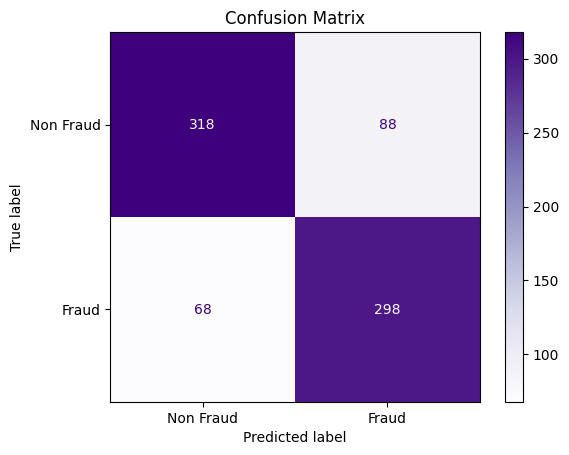

In [56]:

# Evaluating using confusion matrix
ConfusionMatrix(model=model, data=dWrap.data, use_test_mask=True, saveFig="")